In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints

from utils.quaternion import quaternion_to_rotation_matrix
from utils.view_plot import plot_predicted_quaternions, plot_euler_angles_over_time, plot_euler_angles_3d

Current Working Directory: /home/wiktoria/Documents/slajdy/research and development/project/RaD_team1_HELIXON/kalman
Found file: /home/wiktoria/Documents/slajdy/research and development/project/RaD_team1_HELIXON/kalman/../utils/spiral_data/sensor_data_up_b.csv


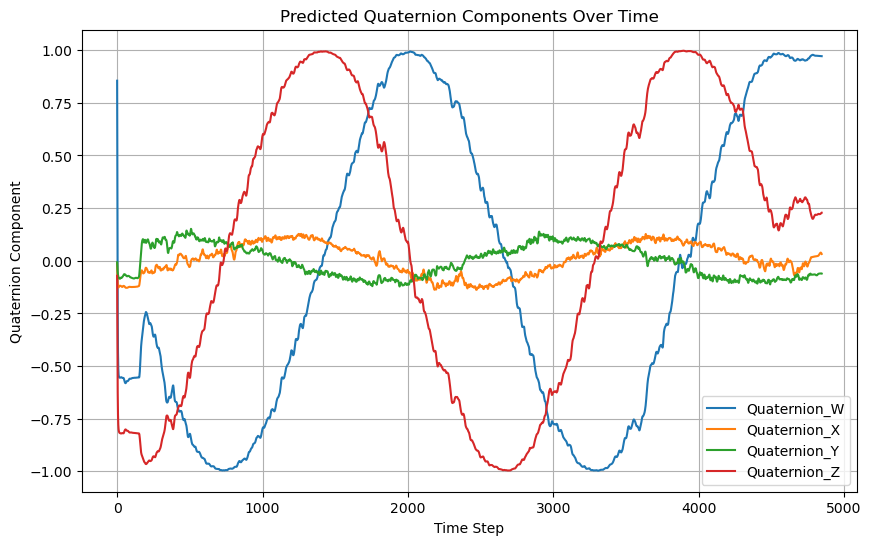

In [9]:
#import view_plot

# Checking and printing the current working directory
print(f"Current Working Directory: {os.getcwd()}")

# Define file path relative to the current working directory
data_file_path = "../utils/spiral_data/sensor_data_up_b.csv"
full_data_file_path = os.path.join(os.getcwd(), data_file_path)

# Checking if the path exists
if not os.path.exists(full_data_file_path):
    print(f"File not found: {full_data_file_path}")
else:
    print(f"Found file: {full_data_file_path}")

# Reading the CSV file
sensor_data_df = pd.read_csv(full_data_file_path)

# Assuming the dataframe includes columns 'Quaternion_W', 'Quaternion_X', 'Quaternion_Y', 'Quaternion_Z' for quaternions
quaternion_data = sensor_data_df[['Quaternion_W', 'Quaternion_X', 'Quaternion_Y', 'Quaternion_Z']].values

# Initialize and configure Unscented Kalman Filter (UKF)
dim_x = 4
dim_z = 4
points = MerweScaledSigmaPoints(n=dim_x, alpha=0.1, beta=2.0, kappa=0.0)
ukf = UKF(dim_x=dim_x, dim_z=dim_z, fx=lambda x, dt: x, hx=lambda x: x, dt=1/25, points=points)
ukf.x = np.array([1, 0, 0, 0])  # Initial state
ukf.P *= 0.1  # Initial covariance
ukf.Q = np.eye(dim_x)*0.2

# Predict states with UKF
predicted_states = []
for q in quaternion_data:
    q = q / np.linalg.norm(q)
    ukf.predict()
    ukf.update(q)
    predicted_states.append(ukf.x)
predicted_states = np.array(predicted_states)

plot_predicted_quaternions(predicted_states)

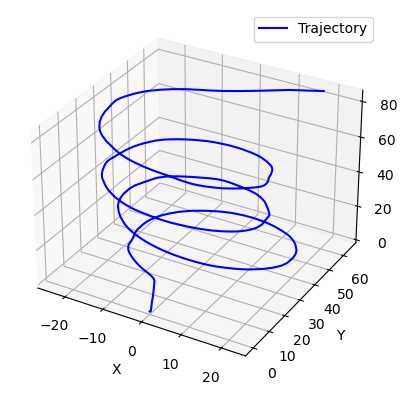

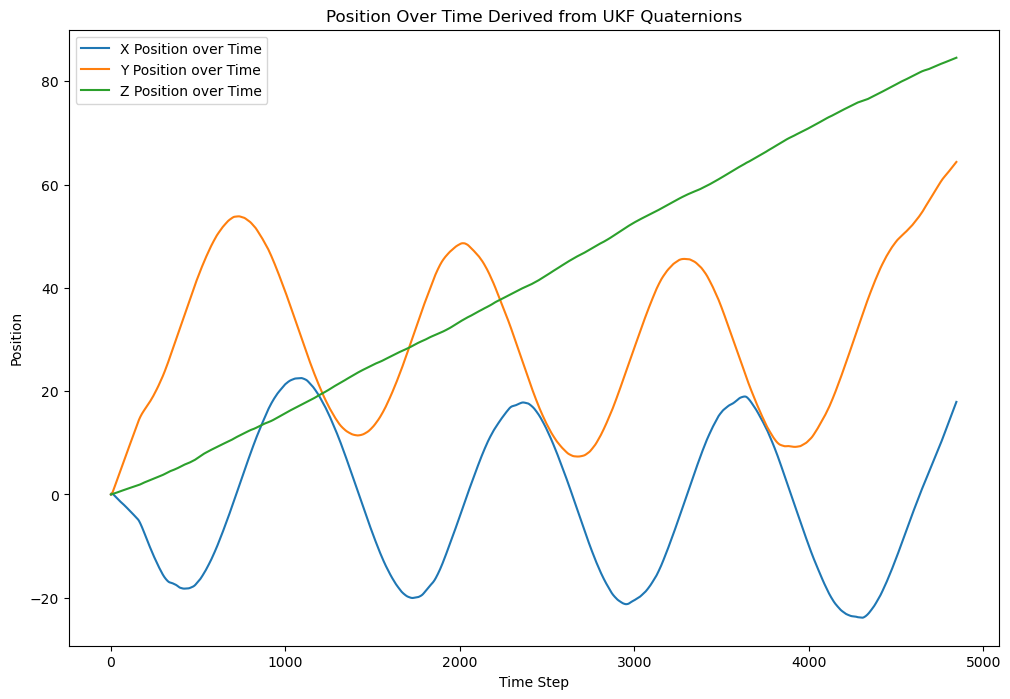

In [16]:
from kalman.utils.view_plot import plot_predicted_positions

# Initialize a position array using the number of UKF steps
num_steps = len(predicted_states)
ukf_positions = np.zeros((num_steps, 3))

# Assuming a constant movement direction (e.g., x-axis) and step size
initial_velocity = np.array([0.1, 0, 0])

# Calculate positions based on UKF quaternion-derived rotations
for i in range(1, num_steps):
    rotation_matrix = quaternion_to_rotation_matrix(predicted_states[i])
    ukf_positions[i] = ukf_positions[i - 1] + rotation_matrix @ initial_velocity

plot_predicted_positions(ukf_positions)

# Plot positions over time
plt.figure(figsize=(12, 8))
plt.plot(ukf_positions[:, 0], label='X Position over Time')
plt.plot(ukf_positions[:, 1], label='Y Position over Time')
plt.plot(ukf_positions[:, 2], label='Z Position over Time')
plt.title('Position Over Time Derived from UKF Quaternions')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.show()

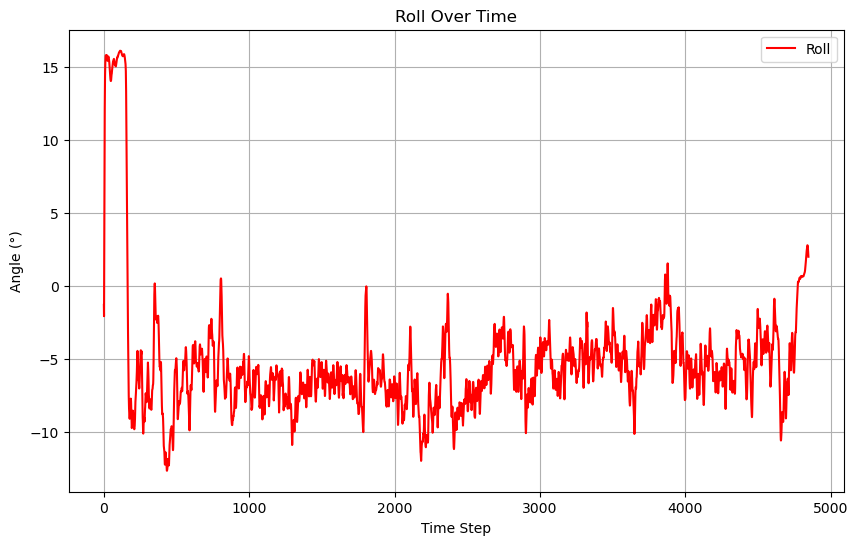

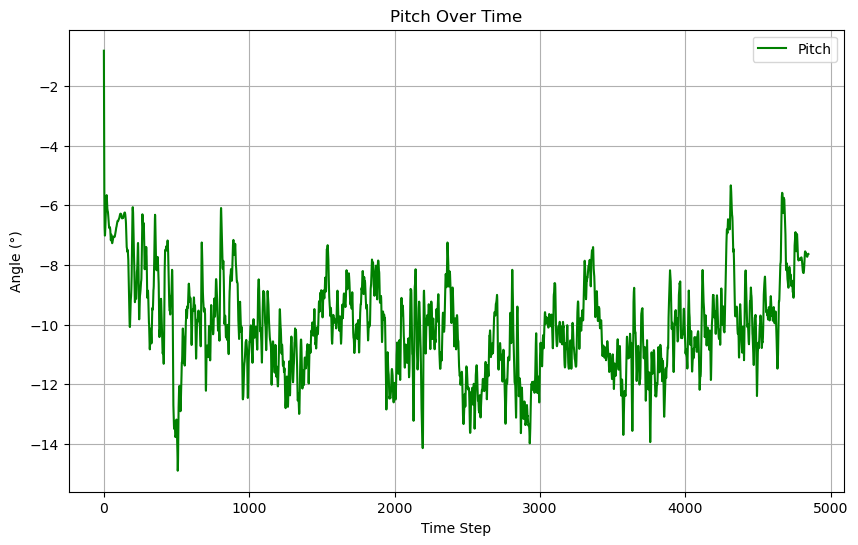

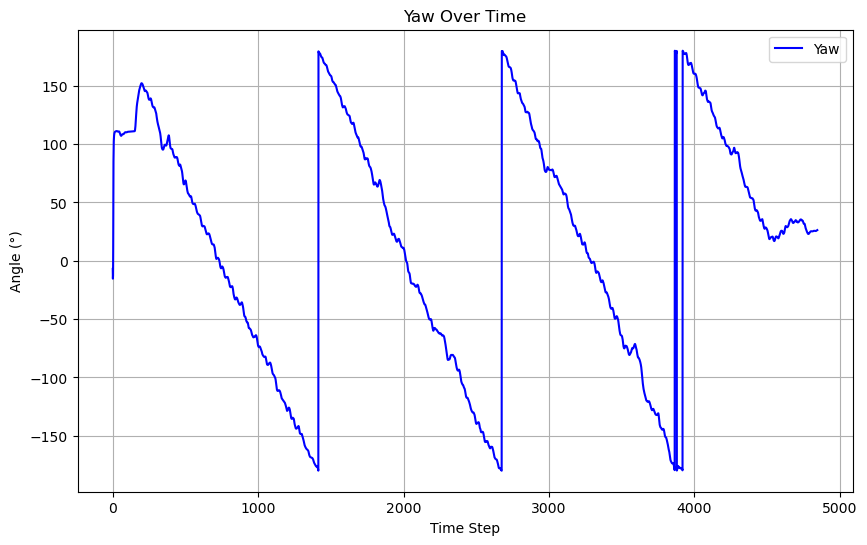

In [12]:
plot_euler_angles_over_time(predicted_states)

In [14]:
plot_euler_angles_3d(predicted_states,20)

NameError: name 'view_plot' is not defined